## Storm surge and wave climate
Notebook environment to migrate netcdf files to CF compliant zarr

In [1]:
# Optional; code formatter, installed as jupyter lab extension
#%load_ext lab_black
# Optional; code formatter, installed as jupyter notebook extension
%load_ext nb_black

<IPython.core.display.Javascript object>

### Set up modules and paths

In [2]:
# Import standard packages
import os
import pathlib
import sys
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc
import numpy.ma as ma

# Import custom functionality
from coclicodata.drive_config import p_drive
from coclicodata.etl.cf_compliancy_checker import check_compliancy, save_compliancy
from coastmonitor.io.utils import name_block

# Make root directories importable by appending root to path
cwd = pathlib.Path().resolve()
sys.path.append(os.path.dirname(cwd))

# Get root paths
home = pathlib.Path().home()
root = home.root

# Define (local and) remote drives
coclico_data_dir = p_drive.joinpath("11207608-coclico", "FULLTRACK_DATA")

# Workaround to the Windows OS (10) udunits error after installation of cfchecker: https://github.com/SciTools/iris/issues/404
os.environ["UDUNITS2_XML_PATH"] = str(
    home.joinpath(  # change to the udunits2.xml file dir in your Python installation
        r"Anaconda3\pkgs\udunits2-2.2.28-h892ecd3_0\Library\share\udunits\udunits2.xml"
    )
)

C:\Users\kras\AppData\Local\Temp\ipykernel_6796\86448705.py:6: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
c:\SnapVol

<IPython.core.display.Javascript object>

In [167]:
# Project paths & files (manual input)
WP_dir = coclico_data_dir.joinpath("WP3")
data_dir = WP_dir.joinpath("data")
ds_dir = data_dir.joinpath("NetCDF")
ds_dirfut = data_dir.joinpath("NetCDF_MarineDynamicsChanges_TWL")
ds_dirupdate = data_dir.joinpath("NetCDF_MarineDynamicsUpdate")

ds_filename = ds_dir.joinpath("CTP_MarineClimatologies.nc")
ds_filename_fut245 = ds_dirfut.joinpath("CTP_MarineDynamicsChanges_ssp245.nc")
ds_filename_fut585 = ds_dirfut.joinpath("CTP_MarineDynamicsChanges_ssp585.nc")
ds_filename_update245 = ds_dirupdate.joinpath("CTP_MarineDynamicsProyected_SSP245.nc")
ds_filename_update585 = ds_dirupdate.joinpath("CTP_MarineDynamicsProyected_SSP585.nc")

ds_out_filename = ds_dirupdate.joinpath("CTP_MarineClimatologies")

CF_dir = data_dir.joinpath(r"CF")

<IPython.core.display.Javascript object>

### Check CF compliancy original NetCDF files


In [168]:
ds = xr.open_dataset(ds_filename)
ds_fut245 = xr.open_dataset(ds_filename_fut245)
ds_fut585 = xr.open_dataset(ds_filename_fut585)
ds_up245 = xr.open_dataset(ds_filename_update245)
ds_up585 = xr.open_dataset(ds_filename_update585)

# Add CRS
ds.attrs["crs"] = 3035
ds_fut245.attrs["crs"] = 3035
ds_fut585.attrs["crs"] = 3035

ds

<xarray.Dataset>
Dimensions:      (locs: 51010)
Coordinates:
    lon          (locs) float64 ...
    lat          (locs) float64 ...
Dimensions without coordinates: locs
Data variables:
    Hsmean       (locs) float64 ...
    SSp99        (locs) float64 ...
    tidal_range  (locs) float64 ...
Attributes:
    title:         EU Coastal Target Points - Coastal marine climatologies
    summary:       Location of Coastal Target Points and their respective mea...
    institution:   Universidad de Cantabria, Instituto de Hidráulica Ambienta...
    keywords:      Waves, Storm surge, tide, coast, EU scale
    date_created:  28nd of February 2024
    project:       CoCliCo - Coastal Climate Core Services
    Conventions:   CF-1.8
    crs:           3035

<IPython.core.display.Javascript object>

In [57]:
ds_up585

<xarray.Dataset>
Dimensions:  (locs: 51010)
Coordinates:
    lon      (locs) float64 ...
    lat      (locs) float64 ...
Dimensions without coordinates: locs
Data variables:
    hs       (locs) float64 ...
    ss99     (locs) float64 ...
    slr      (locs) float64 ...
Attributes:
    title:             EU Coastal Target Points - Coastal marine climatologies
    summary:           Location of Coastal Target Points and their respective...
    institution:       Universidad de Cantabria, Instituto de Hidráulica Ambi...
    keywords:          Waves, Storm surge, tide, coast, EU scale
    date_created:      23rd of September 2024
    project:           CoCliCo - Coastal Climate Core Services
    CMIP_phase:        CMIP6
    CMIP_models:       MRI-ESM2-0 MPI-ESM1-2-HR EC-Earth3 CNRM-CM6-1-HR
    forcing_scenario:  ssp585
    reference_period:  from 1995-01-01 to 2014-12-31
    period:            from 2081-01-01 to 2100-12-31
    Conventions:       CF-1.8

<IPython.core.display.Javascript object>

In [7]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=ds_filename, working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [8]:
# save original CF compliancy
save_compliancy(cap, testfile=ds_filename, working_dir=CF_dir)

# NOTE: File is already CF-compliant :)

{'P:\\11207608-coclico\\FULLTRACK_DATA\\WP3\\data\\NetCDF\\CTP_MarineClimatologies.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

In [9]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=ds_filename_fut245, working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [10]:
# save original CF compliancy
save_compliancy(cap, testfile=ds_filename_fut245, working_dir=CF_dir)

# NOTE: File is already CF-compliant :)

{'P:\\11207608-coclico\\FULLTRACK_DATA\\WP3\\data\\NetCDF_MarineDynamicsChanges_TWL\\CTP_MarineDynamicsChanges_ssp245.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

In [11]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=ds_filename_fut585, working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [12]:
# save original CF compliancy
save_compliancy(cap, testfile=ds_filename_fut585, working_dir=CF_dir)

# NOTE: File is already CF-compliant :)

{'P:\\11207608-coclico\\FULLTRACK_DATA\\WP3\\data\\NetCDF_MarineDynamicsChanges_TWL\\CTP_MarineDynamicsChanges_ssp585.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

In [13]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=ds_filename_update245, working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [14]:
# save original CF compliancy
save_compliancy(cap, testfile=ds_filename_update245, working_dir=CF_dir)

# NOTE: File is already CF-compliant :)

{'P:\\11207608-coclico\\FULLTRACK_DATA\\WP3\\data\\NetCDF_MarineDynamicsUpdate\\CTP_MarineDynamicsProyected_SSP245.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

In [15]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=ds_filename_update585, working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [16]:
# save original CF compliancy
save_compliancy(cap, testfile=ds_filename_update585, working_dir=CF_dir)

# NOTE: File is already CF-compliant :)

{'P:\\11207608-coclico\\FULLTRACK_DATA\\WP3\\data\\NetCDF_MarineDynamicsUpdate\\CTP_MarineDynamicsProyected_SSP585.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

### Make CF compliant alterations to the NetCDF files (dataset dependent)

In [169]:
# ds alterations

# add SLR variabel with zeros to the dataset (assumed zero for present-day)
ds["slr"] = xr.DataArray(
    np.zeros(ds["Hsmean"].shape), dims=ds["Hsmean"].dims, coords=ds["Hsmean"].coords
)

# rename locs to stations
ds = ds.rename_dims({'locs': 'stations'})

# rename variables
ds = ds.rename_vars({'Hsmean': 'hs', 'SSp99': 'ssl'})

<IPython.core.display.Javascript object>

In [170]:
# ds_up alterations

# rename locs to stations
ds_up245 = ds_up245.rename_dims({'locs': 'stations'})
ds_up585 = ds_up585.rename_dims({'locs': 'stations'})

# copy tidal range from ds to ds_up dataset (assumed the same for all future scenarios)
ds_up245["tidal_range"] = ds["tidal_range"]
ds_up585["tidal_range"] = ds["tidal_range"]

# rename variables
ds_up245 = ds_up245.rename_vars({'ss99': 'ssl'})
ds_up585 = ds_up585.rename_vars({'ss99': 'ssl'})

<IPython.core.display.Javascript object>

In [171]:
# construct the combined dataset

# extend the dataset dimensions with time and scenarios in orde to merge
ds_none_2010 = ds.expand_dims(dim={"time": [float(2010)], "scenarios": np.array(["none"], dtype="S")}).rename_dims({"scenarios": "nscenarios"})
ds_ssp245_2100 = ds_up245.expand_dims(dim={"time": [float(2100)], "scenarios": np.array(["SSP245"], dtype="S")}).rename_dims({"scenarios": "nscenarios"})
ds_ssp585_2100 = ds_up585.expand_dims(dim={"time": [float(2100)], "scenarios": np.array(["SSP585"], dtype="S")}).rename_dims({"scenarios": "nscenarios"})

# also make dummy datasets using ds to complete the matrix (see WP2 integrated scenario mapping excel for visual guidance)
ds_none_2100 = ds.expand_dims(dim={"time": [float(2100)], "scenarios": np.array(["none"], dtype="S")}).rename_dims({"scenarios": "nscenarios"})
ds_ssp245_2010 = ds.expand_dims(dim={"time": [float(2010)], "scenarios": np.array(["SSP245"], dtype="S")}).rename_dims({"scenarios": "nscenarios"})
ds_ssp585_2010 = ds.expand_dims(dim={"time": [float(2010)], "scenarios": np.array(["SSP585"], dtype="S")}).rename_dims({"scenarios": "nscenarios"})

# merge datasets
dsmergeddum = xr.merge([ds_none_2010, ds_ssp245_2100, ds_ssp585_2100, ds_none_2100, ds_ssp245_2010, ds_ssp585_2010])

<IPython.core.display.Javascript object>

In [172]:
dsmergeddum

<xarray.Dataset>
Dimensions:      (time: 2, nscenarios: 3, stations: 51010)
Coordinates:
  * time         (time) float64 2.01e+03 2.1e+03
  * scenarios    (nscenarios) object b'SSP245' b'SSP585' b'none'
    lon          (stations) float64 -5.28 -5.269 -5.315 ... 14.57 14.57 14.58
    lat          (stations) float64 35.69 35.69 35.69 ... 35.87 35.85 35.86
Dimensions without coordinates: nscenarios, stations
Data variables:
    hs           (time, nscenarios, stations) float64 0.5232 0.527 ... 0.7075
    ssl          (time, nscenarios, stations) float64 0.1677 0.168 ... 0.1944
    tidal_range  (time, nscenarios, stations) float64 0.5235 0.5235 ... 0.142
    slr          (time, nscenarios, stations) float64 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    title:         EU Coastal Target Points - Coastal marine climatologies
    summary:       Location of Coastal Target Points and their respective mea...
    institution:   Universidad de Cantabria, Instituto de Hidráulica Ambienta...
    keywords:      Waves, Storm surge, tide, coast, EU scale
    date_created:  28nd of February 2024
    project:       CoCliCo - Coastal Climate Core Services
    Conventions:   CF-1.8
    crs:           3035

<IPython.core.display.Javascript object>

In [173]:
# change up some global attributes and variable attrs

# global attrs
dsmergeddum.attrs["summary"] =  "Location of Coastal Target Points and their respective mean significant wave height, 99th percentile storm surge, mean tidal range and 50th percentile sea level rise indicators"
dsmergeddum.attrs["date_created"] = "23th of September 2024"

# add or change certain variable / coordinate attributes
dataset_attributes = {
    "time": {"long_name": "time", "units": "yr"},
    "scenarios": {"long_name": "climate scenarios"},
    "slr": {"long_name": "sea level rise", "short_name": "SLR", "units": "m", "description": "50th percentile sea level rise"},
}  # specify custom (CF convention) attributes

# add / overwrite attributes
for k, v in dataset_attributes.items():
    try:
        dsmergeddum[k].attrs = dataset_attributes[k]
    except:
        continue

<IPython.core.display.Javascript object>

In [176]:
# save new .nc files
dsmergeddum.to_netcdf(path=str(ds_filename_update245).replace("CTP_MarineDynamicsProyected_SSP245.nc", "CTP_MarineDynamics_CF.nc"))

<IPython.core.display.Javascript object>

### Check CF compliancy altered NetCDF files

In [177]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=str(ds_filename_update245).replace("CTP_MarineDynamicsProyected_SSP245.nc", "CTP_MarineDynamics_CF.nc"), working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [178]:
# save original CF compliancy
save_compliancy(cap, testfile=str(ds_filename_update245).replace("CTP_MarineDynamicsProyected_SSP245.nc", "CTP_MarineDynamics_CF.nc"), working_dir=CF_dir)

# NOTE: File is CF-compliant :)

{'P:\\11207608-coclico\\FULLTRACK_DATA\\WP3\\data\\NetCDF_MarineDynamicsUpdate\\CTP_MarineDynamics_CF.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

### write data to Zarr files

In [179]:
# export to zarr in write mode (to overwrite if exists)
dsmergeddum.to_zarr(ds_dir.joinpath("%s.zarr" % ds_out_filename), mode="w")

<IPython.core.display.Javascript object>

### Open written dataset

In [180]:
ds_new = xr.open_zarr(ds_dir.joinpath("%s.zarr" % ds_out_filename))
ds_new

<xarray.Dataset>
Dimensions:      (time: 2, nscenarios: 3, stations: 51010)
Coordinates:
    lat          (stations) float64 dask.array<chunksize=(25505,), meta=np.ndarray>
    lon          (stations) float64 dask.array<chunksize=(25505,), meta=np.ndarray>
    scenarios    (nscenarios) |S6 dask.array<chunksize=(3,), meta=np.ndarray>
  * time         (time) float64 2.01e+03 2.1e+03
Dimensions without coordinates: nscenarios, stations
Data variables:
    hs           (time, nscenarios, stations) float64 dask.array<chunksize=(1, 2, 25505), meta=np.ndarray>
    slr          (time, nscenarios, stations) float64 dask.array<chunksize=(1, 2, 25505), meta=np.ndarray>
    ssl          (time, nscenarios, stations) float64 dask.array<chunksize=(1, 2, 25505), meta=np.ndarray>
    tidal_range  (time, nscenarios, stations) float64 dask.array<chunksize=(1, 2, 25505), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.8
    crs:           3035
    date_created:  23th of September 2024
    institution:   Universidad de Cantabria, Instituto de Hidráulica Ambienta...
    keywords:      Waves, Storm surge, tide, coast, EU scale
    project:       CoCliCo - Coastal Climate Core Services
    summary:       Location of Coastal Target Points and their respective mea...
    title:         EU Coastal Target Points - Coastal marine climatologies

<IPython.core.display.Javascript object>

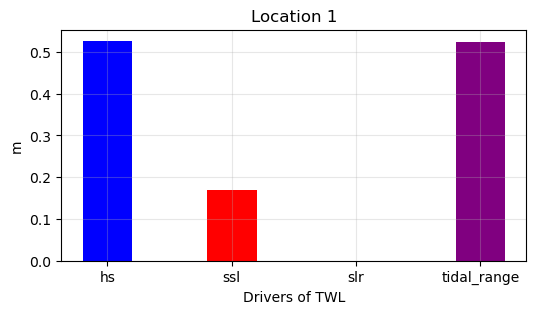

<IPython.core.display.Javascript object>

In [227]:
# make one bar plot of the components when selecting a certain set of variables
loc = 1 # location to plot
nscenarios = 0 # scenario to plot
time = 0 # time to plot

import matplotlib.pyplot as plt
import pandas as pd

def plot_components(ds, loc, nscenarios, time):
    # Extract the data for the given indices
    selected = ds.isel(stations=loc, nscenarios=nscenarios, time=time)

    # Extract the variables you're interested in
    variables = ["hs", "ssl", "slr", "tidal_range"]
    data = [float(selected[var].values) for var in variables]

    # Create a DataFrame for plotting
    df = pd.DataFrame({
        "Variable": variables,
        "Value": data,
        "Color": ["blue", "red", "green", "purple"]
    })

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.bar(df["Variable"], df["Value"], color=df["Color"], width=0.4)
    ax.set_title(f"Location {loc}")
    ax.set_ylabel("m")
    ax.set_xlabel("Drivers of TWL")
    ax.grid(alpha=0.3)
    plt.show()

# Example usage
plot_components(ds_new, loc, nscenarios, time)

In [213]:
ds_new.isel(stations=loc, nscenarios=nscenarios, time=time).hs.plot.hist()

TypeError: No numeric data to plot.

<IPython.core.display.Javascript object>

In [217]:
ds_new.hs.isel(stations=loc, nscenarios=nscenarios, time=time).values

array(0.52699404)

<IPython.core.display.Javascript object>